In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from RNN import RNN

In [2]:
def autocorr(signal, tau):
    """
    For signal x and time constant tau, returns C where:
    C = (1/N) * sum_{i=1}^N <x(t), x(t+tau)>
    See Rajan, Abbott, and Sompolinsky (2010), equation 3
    """
    
    N, T = signal.shape
    C = 0
    for i in range(N):
        time_avg = 0
        for t in np.arange(0, T-tau):
            time_avg += signal[i,t]*signal[i,t+tau]
        time_avg /= T
        C += time_avg
    C /= N
    return C

In [3]:
def plot_activity(output, num_units_to_plot):
    num_units, num_t = output.shape
    units_to_plot = np.random.choice(
        np.arange(num_units), num_units_to_plot, replace=False
        )
    y_offsets = (np.arange(num_units_to_plot) - num_units_to_plot/2.)*10
    output = output[units_to_plot,:]
    for t in range(num_t):
        output[:,t] = output[:,t] + y_offsets
    plt.figure(figsize=(7,5))
    plt.plot(output.T)
    plt.yticks([])
    plt.ylabel("Unit Activity")
    plt.xlabel("Time Step")

In [4]:
def plot_result(output, num_units_to_plot):
    """
    Plots output as a grid. Each row corresponds to one randomly
    selected unit. The first column is the unit activity, the 
    second is the autocorrelation function, the third is the
    logarithmic power spectrum.
    """
    
    N, T = output.shape
    
    # Plot unit activity for one second
    plot_activity(output, num_units_to_plot)
    
    # Plot autocorrelation function
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    autocorr_tau = []
    for tau in np.arange(1,100): # From 10 ms to 1000 ms
        autocorr_tau.append(autocorr(output, tau))
    axs[0].set_title("Average Autocorrelation")
    axs[0].set_xlabel("Tau")
    axs[0].plot(autocorr_tau)
    
    # Plot logarithmic power spectrum
    avg_log_Pxx = []
    for i in range(N):
        signal = output[i,:]
        f, Pxx = periodogram(signal, fs=100, scaling='spectrum')
        log_Pxx = np.log(Pxx)
        avg_log_Pxx.append(log_Pxx)
    avg_log_Pxx = np.array(avg_log_Pxx)
    avg_log_Pxx = np.mean(avg_log_Pxx, axis=0)
    avg_log_Pxx = avg_log_Pxx[f <= 16]
    f = f[f <= 16]
    axs[1].set_title("Log Power Spectrum")
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].plot(f, avg_log_Pxx)

In [8]:
rnn = RNN(1.5, 1000)

In [6]:
seconds = 3
tau = 10
num_time_steps = int((1000*seconds)/tau)
output = rnn.simulate(num_time_steps)

/home/chingf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


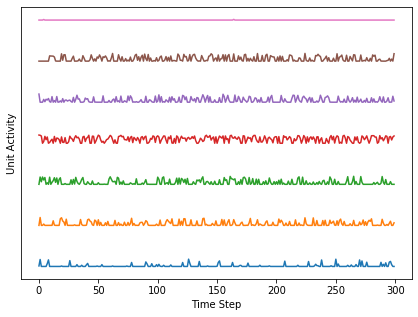

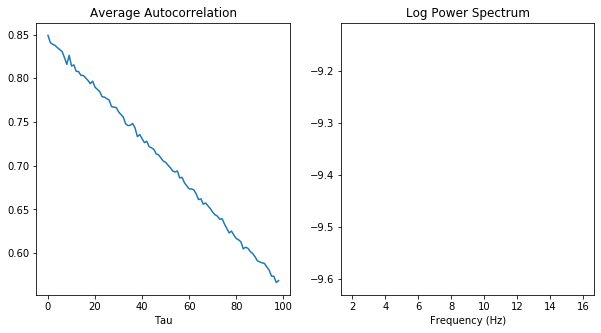

In [7]:
plot_result(output, 7)